In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
restaurants = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/restaurants.txt",
    sep = '\t')
restaurants

restaurant     x     y
0           r1  8708  5633
1           r2  9103  6345
2           r3  8991  6342
3           r4  8542  5317
4           r5  7577  5076
..         ...   ...   ...
111       r112  8884  7405
112       r113   796  6628
113       r114  7526  7726
114       r115  9843  9303
115       r116  4989  7474

[116 rows x 3 columns]

In [3]:
orders = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/orders.txt",
    sep = '\t')
orders

order     x     y  placement_time restaurant  ready_time
0      o1  9131  7497             743         r1         753
1      o2  9024  6677             541         r2         557
2      o3  5645  7048             626         r3         656
3      o4  6019  5613             566         r4         582
4      o5  7083  5106             574         r5         582
..    ...   ...   ...             ...        ...         ...
500  o501  6531  4914             497       r102         521
501  o502  3813  8200             289        r99         325
502  o503  3023  4692             576        r93         588
503  o504  9417  4103             623        r28         649
504  o505  8804  5179             597         r7         604

[505 rows x 6 columns]

In [176]:
couriers = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/couriers.txt",
    sep = '\t')
couriers

courier      x      y  on_time  off_time
0        c1  11491   2806        0        90
1        c2   7950    223        0        90
2        c3   2818  10568       30       210
3        c4  12413   7222       90       270
4        c5   3572   3264       90       270
..      ...    ...    ...      ...       ...
108    c109  10855   7784      690       810
109    c110   7038   5694      690       840
110    c111   5013   2778      690       810
111    c112   8236   1518      690       810
112    c113   4981   4827      690       840

[113 rows x 5 columns]

## 배달원 근무시간

In [247]:
c_on_sum = couriers['on_time'].value_counts().sort_index().cumsum()
c_on_sum

0        2
30       3
90      25
210     27
270     37
390     39
400     40
450     65
510     92
630    104
690    113
Name: on_time, dtype: int64

In [249]:
c_off_sum = couriers['off_time'].value_counts().sort_index().cumsum()
c_off_sum

90       2
210      5
270     24
293     25
330     27
450     38
510     40
560     41
630     68
645     69
690     92
702     93
750    104
810    110
840    113
Name: off_time, dtype: int64

In [343]:
c_on_sum - c_off_sum

0       NaN
30      NaN
90     23.0
210    22.0
270    13.0
293     NaN
330     NaN
390     NaN
400     NaN
450    27.0
510    52.0
560     NaN
630    36.0
645     NaN
690    21.0
702     NaN
750     NaN
810     NaN
840     NaN
dtype: float64

<AxesSubplot:xlabel='on_time', ylabel='count'>

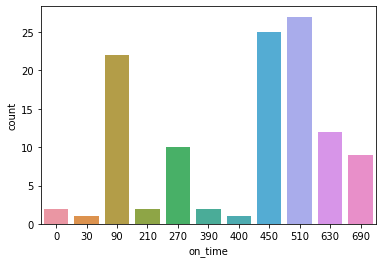

In [344]:
sns.countplot(x='on_time', data=couriers)

<AxesSubplot:>

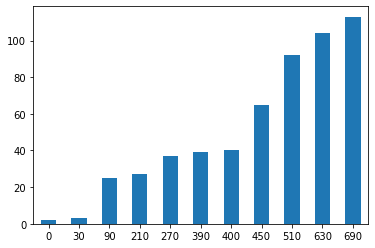

In [264]:
on_plot = c_on_sum.plot.bar(x=c_time, y=c_on_sum.keys, rot=0)
on_plot

<AxesSubplot:>

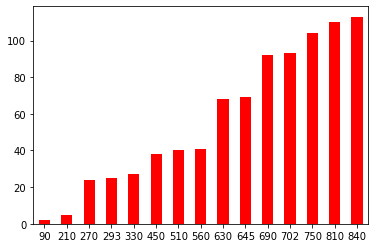

In [265]:
off_plot = c_off_sum.plot.bar(x=c_time, y=c_on_sum.keys, rot=0, color='r')
off_plot

In [346]:
plt.plot('on_time' - 'off_time', data=couriers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

[0,  30,  90, 210, 270, 390, 400, 450, 510, 630, 690,
          90, 210, 270, 293, 330, 450, 510, 560, 630, 645, 690, 750, 702, 810, 840]

In [ ]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10, 10

<AxesSubplot:xlabel='off_time'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


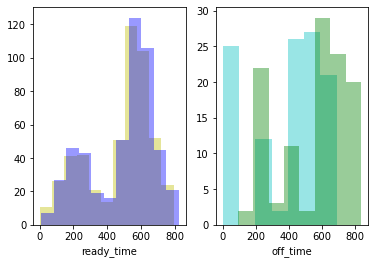

In [5]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(orders['placement_time'], kde = False, color = 'y', ax=ax[0])
sns.distplot(orders['ready_time'], kde = False, color = 'b', ax=ax[0])

sns.distplot(couriers['on_time'], kde = False, color = 'c', ax=ax[1])
sns.distplot(couriers['off_time'], kde = False, color = 'g', ax=ax[1])

restaurants(116), couriers(113), orders(505) 간의 거리

In [10]:
from scipy.spatial.distance import cityblock

In [11]:
a = [8708, 5633]
b = [9103, 6345]
print(cityblock(a,b))

1107


### restaurants dist (116)

In [296]:
r_dist = restaurants[['x', 'y']].values
r_dist

array([[ 8708,  5633],
       [ 9103,  6345],
       [ 8991,  6342],
       [ 8542,  5317],
       [ 7577,  5076],
       [10970,  7418],
       [ 8910,  7595],
       [ 6461,  6158],
       [10269,  6113],
       [ 5979,  7970],
       [ 2901,  7474],
       [ 8880,  7888],
       [ 4607,  5595],
       [ 6756,  9240],
       [ 7654,  7632],
       [ 8466,  5699],
       [ 8736,  4191],
       [ 8737,  6451],
       [ 4945,  5485],
       [ 8624,  8334],
       [ 4710,  7839],
       [ 8938,  7594],
       [ 3063,  7406],
       [ 8715,  4634],
       [10252,  6144],
       [ 9968,  9024],
       [ 9723,  4414],
       [ 9229,  7943],
       [ 8695,  7993],
       [ 9344,  5383],
       [ 4314,  5415],
       [ 9732,  4546],
       [ 9643,  8947],
       [ 4977,  7640],
       [ 9468,  6260],
       [10116,  6102],
       [ 9751,  9370],
       [ 3742,  7274],
       [ 5593,  7438],
       [10268,  7110],
       [ 5199,  7276],
       [ 9992,  7662],
       [ 6408,  6176],
       [ 98

In [299]:
def euclidean_distance(A, B):
    distance = 0
    for i in range(len(A)):
        distance += (A[i] - B[i]) ** 2
    return distance ** 0.5
  
print(euclidean_distance(A=[8708,  5633], B=[9103,  6345]))

def manhattan_distance(A, B):
    distance = 0
    for i in range(len(A)):
        distance += abs(A[i] - B[i])
    return distance
 
print(manhattan_distance(A=[8708,  5633], B=[9103,  6345]))

print(cityblock(r_dist[0], r_dist[1]))

814.229083243776
1107
1107


In [306]:
r_dist = restaurants[['x', 'y']].values

for i in range(0,116):
    for j in range(0,116):
        r_city = cityblock(r_dist[i], r_dist[j])
        print(r_city)

0
1107
992
482
1688
4047
2164
2772
2041
5066
7648
2427
4139
5559
3053
308
1470
847
3911
2785
6204
2191
7418
1006
2055
4651
2234
2831
2373
886
4612
2111
4249
5738
1387
1877
4780
6607
4920
3037
5152
3313
2843
4553
1976
5144
554
605
2158
2774
1413
5284
1736
2338
347
1919
1171
2738
4814
2009
4643
4732
4781
5577
1457
4772
1677
215
711
949
4571
2467
2230
5720
3127
4387
2752
5249
5324
308
4038
3743
4657
7067
4391
5225
258
1718
350
2689
2642
3093
4948
557
4523
5851
2615
5186
5688
3428
5536
5195
4305
2589
1615
951
2493
2697
4348
4457
3255
1948
8907
3275
4805
5560
1107
0
115
1589
2795
2940
1443
2829
1398
4749
7331
1766
5246
5242
2736
1283
2521
472
5018
2468
5887
1414
7101
2099
1350
3544
2551
1724
2056
1203
5719
2428
3142
5421
450
1256
3673
6290
4603
1930
4835
2206
2864
3446
1061
4827
843
1712
2475
3881
2520
4967
2843
1949
1454
1602
854
2421
3707
2326
3536
3625
3674
5260
1290
3665
1794
1322
1634
1812
3464
1360
3337
5403
2020
4070
2845
4932
5007
1415
3721
3426
4340
8174
4074
4118
1365
2825
757
158

1729
7455
4328
6004
890
1872
2650
4412
998
6047
2758
1556
323
8616
1356
3106
3641
1171
854
745
1325
2531
3204
1321
2565
2252
3895
6477
1584
4982
4388
1882
1019
2641
382
4754
1774
5033
1348
6247
2177
2204
3808
3405
1988
1504
2057
5455
3282
3406
4567
1304
2110
3937
5436
3749
2194
3981
2470
2600
3710
1133
3973
1697
1448
3329
3617
2256
4113
2579
1495
1190
856
0
1845
3971
3180
3800
3889
3938
4406
1026
3929
2648
1058
1882
2120
3728
1624
3277
4549
2284
3216
2581
4078
4153
1453
2867
2572
3486
7910
3220
4382
1305
2561
1361
1846
1799
2250
3777
1400
3352
4680
3458
4015
4517
2585
6707
4024
5148
1746
1016
1794
3664
1854
5191
3614
2412
1105
7760
2104
3962
4389
2738
2421
2312
3170
4376
3215
978
4410
3819
3080
6654
655
6827
2821
1743
2864
4208
1949
6599
71
4480
1007
6560
3744
3771
1963
4972
949
365
3624
7300
4849
1561
4412
2871
3677
2092
6013
3998
2821
4554
1993
4445
1865
1360
5334
3264
3293
4896
5462
4101
2546
4424
472
3035
989
1845
0
2126
4747
1955
2044
2093
4729
2871
2084
4215
2903
3449
3687
1883
2

### couriers dist(113)

In [303]:
c_dist = couriers[['x', 'y']].values
c_dist

array([[11491,  2806],
       [ 7950,   223],
       [ 2818, 10568],
       [12413,  7222],
       [ 3572,  3264],
       [ 9104, 10812],
       [ 9135,  2795],
       [ 6152,   483],
       [    0,  7262],
       [10640,  1782],
       [12054,  3851],
       [ 1665,  6706],
       [10821,  1966],
       [ 9792,  1088],
       [ 7996,   237],
       [ 6406,  5207],
       [ 3742,  7596],
       [ 6541,  4301],
       [ 3502, 10823],
       [ 7691,  7328],
       [ 1819,  6723],
       [ 9556,  7777],
       [12346,  4705],
       [ 5028,  9204],
       [ 7888,   206],
       [ 4779,   143],
       [11457,  2757],
       [ 8274,  8312],
       [  164,  8272],
       [ 3698,  8149],
       [11670,  3091],
       [ 3554,  7018],
       [ 5825,  5018],
       [ 5167,  1707],
       [ 6707,     0],
       [10919,  2072],
       [ 9691,  3350],
       [ 4627,  5402],
       [10479,  5571],
       [  591,  3370],
       [11185,  2386],
       [ 3461,  6279],
       [ 6471,  4531],
       [ 18

In [318]:
len(c_dist)
type(c_dist)

numpy.ndarray

In [333]:
for i in range(0,113):
    for j in range(0,113):
        c_city = np.array(cityblock(c_dist[i], c_dist[j]))
        print(c_city)

0
6124
16435
5338
8377
10393
2367
7662
15947
1875
1608
13726
1510
3417
6064
7486
12539
6445
16006
8322
13589
6906
2754
12861
6203
9375
83
8723
16793
13136
464
12149
7878
7423
7590
1306
2344
9460
3777
11464
726
11503
6745
9848
7500
14656
4411
5907
11986
15831
4486
7305
612
3304
1558
8605
2560
13077
187
6661
7320
13420
11936
8747
13528
7784
2996
12814
17392
3852
10958
3769
8511
2738
2019
4673
16495
15621
8510
9626
5272
3794
6905
6597
371
12042
15147
16245
3101
4654
11685
339
14354
381
8032
10401
5369
14449
10658
7967
15150
17196
11078
8544
12290
15359
485
5366
5614
7341
6506
4543
8531
6124
0
15477
11462
7419
11743
3757
2058
14989
4249
7732
12768
4614
2707
60
6528
11581
5487
15048
7364
12631
9160
8878
11903
79
3251
6041
8413
15835
12178
6588
11191
6920
4267
1466
4818
4868
8502
7877
10506
5398
10545
5787
8574
6542
13698
10535
4949
11028
14873
1638
9711
5512
2820
7682
7647
3564
12119
5937
537
10776
12462
11366
2623
12570
3532
9120
11856
16434
9976
10306
9893
7553
8862
8143
1451
15537
14663


3788
5314
6290
10759
13864
14962
3560
4529
10402
6322
13071
7042
7133
9118
4086
13166
6319
7940
13867
15913
9795
5509
11007
14076
7146
4347
11003
6058
5167
2118
7248
7320
10776
9115
3826
12113
3073
7019
12314
11687
7493
6838
10578
7490
8069
10716
7336
7611
8107
8686
3930
10407
1616
6276
5541
10855
14027
7335
2363
10513
7102
7214
8377
8106
12075
12242
7482
5908
8920
3543
14988
7434
9209
7947
14500
8042
7336
5037
10063
11462
8511
9138
1065
7420
7956
6858
9423
7212
8941
7355
11313
0
8038
4616
13399
7798
12436
6130
5494
10072
5524
3638
5589
10191
6286
6659
9325
9175
8301
13162
14278
4142
5570
11557
10811
7385
13626
7827
8925
7753
6784
11355
7381
7034
7235
4180
7949
8593
7129
15310
3373
7830
9876
8758
13196
7724
8039
7209
6966
1706
6217
11158
9195
9141
13420
12462
3015
9926
5043
9005
11075
10404
3649
13593
12938
2540
13590
13439
12494
5934
881
6975
3414
5098
2369
6514
12376
3321
12417
9371
13435
5675
3373
936
13314
1271
5542
8195
11442
13582
11076
3960
9643
6950
13534
1917
6675
6462
5920
66

In [315]:
for i in range(0,116):
    for j in range(0,113):
        print(cityblock(r_dist[i], c_dist[j]))

5610
6168
10825
5294
7505
5575
3265
7706
10337
5783
5128
8116
5780
5629
6108
2728
6929
3499
10396
2712
7979
2992
4566
7251
6247
9419
5625
3113
11183
7526
5504
6539
3498
7467
7634
5772
3266
4312
1833
10380
5724
5893
3339
9892
3434
9046
4367
5455
6854
10221
5360
3543
5710
5650
5148
4815
4536
7467
5645
6705
4608
7810
6326
8791
7918
7828
4420
7204
11782
3814
5348
3879
5583
4576
4949
5211
10885
10011
8554
9670
466
3860
6949
6203
5675
9018
9537
10635
5683
2176
6747
5671
8744
5525
2422
4791
3985
8839
10702
2357
9540
11586
5468
8588
6680
9749
5499
2358
4298
1731
6550
4587
4533
5927
7275
10508
4187
8612
4468
3582
8813
10020
6100
5445
7799
6097
5946
7215
3835
6612
4606
10079
2395
7662
1885
4883
6934
7354
10526
5942
2796
10866
7209
5821
6222
4605
8574
8741
6089
3583
5419
2150
11487
6041
5708
4446
10999
4541
8729
3644
6562
7961
9904
5677
2436
6027
5967
5465
5922
4853
7150
5962
7812
3501
7493
6009
9898
7601
8935
4737
6887
11465
4131
5031
4196
6690
4893
5266
5824
10568
9694
9661
10777
655
4177
8056


11519
8061
6354
7915
4344
8113
8757
6449
15474
3537
7308
9772
8922
13360
7888
7359
7889
7130
2386
6381
11322
9359
9305
4133
7845
12302
3617
9182
6260
4088
9383
11814
4306
3651
9593
4303
5138
7785
4405
8406
5176
11873
4189
9456
2773
3089
8728
7924
11096
4148
4590
12660
9003
4027
8016
5175
9144
9311
4295
2977
5989
356
12057
4247
7370
5016
11569
5111
10523
2690
7132
8531
11698
6207
3172
4233
5025
3671
6492
4281
8944
4168
8382
3187
9287
7803
10468
9395
9505
2943
8681
13259
2337
6825
2402
7260
3099
3472
6394
12362
11488
10231
11347
1211
2383
8626
7880
4198
10695
11014
12112
4822
3853
8424
4194
10221
4048
3899
6268
5662
10316
12379
3834
11017
13063
6945
10265
8157
11226
4022
4035
2621
3286
8227
6264
6210
5723
5953
10712
5509
7290
5790
3378
7491
10224
5896
5241
8003
5893
5742
5893
2513
6816
3284
10283
2599
7866
3207
4679
7138
6032
9204
5738
3000
11070
7413
5617
6426
3283
7252
7419
5885
3379
4097
1946
10165
5837
5780
3124
9677
3219
8933
4582
5240
6639
10108
5473
3758
5823
5763
5261
4600
4649
7

In [339]:
cityblock(r_dist[1], c_dist[1])

7275

### orders dist(505)

In [64]:
o_dist = orders[['x', 'y']].values

In [190]:
for i in range(0,505):
    for j in range(0,505):
        print(cityblock(o_dist[i], o_dist[j]))

0
927
3935
4996
4439
2045
5589
1811
1420
936
7190
1019
977
10039
6089
646
654
1286
3859
4192
3964
7532
3020
2276
1389
2195
1445
3407
1535
4229
3010
916
1467
1100
886
1914
1119
2542
739
1267
3560
1673
1533
182
4712
279
5004
3690
9627
4289
3017
6187
4663
1532
1928
9037
3879
6941
3267
5804
3074
4475
3756
2298
4639
4962
717
6770
1807
3937
6677
5433
2400
1197
1935
1136
2667
6863
749
786
699
2470
6148
4032
3159
1413
924
3979
3455
3073
2495
2130
3811
2431
1447
4446
5132
1540
1723
8543
3970
10845
4425
2638
2564
2433
2483
2589
4159
1927
7888
7531
5622
1676
3133
4212
1556
3379
2868
4999
4495
3315
3581
7471
4577
2017
4424
5211
2801
366
3362
1446
2010
4406
1533
3443
901
2344
2696
4818
729
3997
1951
1097
1688
6599
4602
2058
8410
3654
5678
10686
1568
3334
5732
3248
2743
3154
2303
3406
2506
1494
7773
2478
4362
3109
4570
6091
173
995
2151
3067
3726
3704
2500
5370
1427
2943
5030
6233
3795
4586
3037
3224
4796
2521
2981
814
4386
3792
3282
1919
3943
1161
3067
2985
2076
2412
281
4383
3416
6155
2423
2949
37

2131
6114
2679
4533
5812
4028
3957
4199
5429
5567
4674
2879
3704
6959
8217
7772
4054
5231
4418
2474
2417
6835
3279
3685
6101
4209
4755
3609
3521
5669
4741
4661
5193
3802
2789
167
4626
7549
4713
2974
3804
5708
6075
2646
6035
1052
3424
6697
901
6529
7862
7592
4015
4842
7315
5560
4139
2105
2854
5000
6931
1884
412
8967
9827
2798
4038
923
6309
2640
2923
1799
1586
1378
3653
4341
3617
4860
4111
5758
2741
869
2965
5457
3111
4148
5437
4637
2455
714
3098
5831
2437
2737
3714
5472
8936
3170
6075
5533
9220
4143
3647
2367
2734
4725
4733
2208
5469
5022
1212
1436
2565
3469
4797
4714
9055
5942
3416
4588
2167
7096
6194
5486
3777
3598
4963
3933
373
4140
2085
4593
3449
5541
3964
6001
375
1639
8060
1780
3757
5292
6283
1060
3925
5113
392
3898
4251
1946
2402
4507
2101
3820
6273
3872
3905
3583
5501
4722
4560
5541
3969
1492
3772
5443
5931
982
6515
7375
3308
5118
6003
4233
3954
8588
7927
1752
3723
4191
3789
3950
1358
3479
7335
8172
5487
2589
4807
3068
5030
7079
2123
1314
2821
3893
5333
5121
5352
4498
2263
6091


4205
2670
4630
3239
968
6195
5691
2119
4777
8667
5773
4545
5620
6407
1613
2708
5188
1888
1064
1332
3701
4639
2173
4028
3696
1858
3695
5193
3147
1981
2884
7795
7676
5132
9606
1936
6874
11882
4102
332
6928
4444
3939
6026
4511
5594
5146
1862
8969
5552
7436
6183
7644
7287
3103
3583
4397
6141
6800
4900
3696
8444
3435
1747
6226
7429
6869
1850
6111
4420
1722
553
2505
3888
4774
4988
6356
1155
5139
2927
4263
4181
3998
5486
2969
1309
4612
7351
4305
6023
4943
661
3333
7712
3466
5437
7065
4708
3740
5119
6726
8387
7545
5376
698
7164
3915
889
562
3929
8036
2059
3196
3820
7379
4004
4828
2394
2882
7764
5008
3147
5483
4518
4846
3681
2490
4141
321
4533
2925
2382
7283
4376
44
589
3917
3672
5272
5943
9618
3146
3588
1099
1440
3493
3607
3002
4950
4235
1526
5243
5339
7445
2533
1256
1610
3835
2996
3337
2870
7680
4954
8977
2440
5664
843
12423
4945
4643
7346
3687
5072
2020
5600
300
4176
5983
1908
3759
1697
4298
5882
5581
1343
1223
2203
4788
3697
4180
2129
5789
7404
8260
761
2856
3138
3185
6567
6233
2375
1947
84

1485
1927
1312
643
1832
1946
1341
3289
2574
2963
3582
5008
5784
3826
755
491
2174
1335
1676
1209
7349
3293
8646
779
5333
1124
12092
4614
4312
7015
3356
3411
973
3939
1587
3845
4322
2239
2098
1366
3967
5551
5250
766
1554
1692
3127
2036
2519
3078
5458
7073
7929
1350
1195
2807
2854
6236
5902
714
2226
8084
880
1780
2220
2938
2446
4104
3082
879
2126
3770
4975
8272
4184
977
3307
1833
2200
5557
4064
4895
943
10578
2984
6942
7061
4877
6064
967
4770
3237
3574
5720
2417
1119
6054
4939
4287
5086
9738
2027
3881
2964
9924
6515
4614
5674
5467
4451
4348
4382
7498
1093
4010
1883
3380
3220
2866
1582
2678
959
1738
762
5960
4589
1101
1950
2184
6612
857
5339
9305
3381
4208
1652
7997
4990
412
4670
2127
3836
852
2861
9344
7745
5093
5235
6052
452
4280
3395
9110
2067
1013
1695
2216
6653
2395
9367
1058
2515
1566
1784
4178
961
3146
1500
5084
1660
2655
2126
3536
5514
11629
2603
1590
5057
2402
4941
3324
1922
4183
1391
8126
4559
1817
2986
5982
1249
2544
797
5072
568
1620
847
4861
1666
2590
4221
751
1568
2056
4863


4230
2039
2148
4832
6037
9334
5246
1963
4369
1933
3650
6619
5126
5957
1975
7660
4046
8004
8123
6629
7126
2087
6352
623
4636
2832
2083
4037
7116
6001
5349
8004
10800
2139
963
4014
10986
7577
5676
6736
4415
3559
5410
1464
4580
1825
1092
2357
4442
4282
3928
2064
3740
1959
1180
2238
7022
5651
1839
4868
3246
7674
2751
6401
10367
1767
5270
4570
9059
2072
2506
5732
2203
4898
3770
3923
10406
8807
5241
6297
7114
2466
5342
4457
10172
1677
1905
1223
2770
7715
1257
6449
1860
3577
1352
1134
5240
1957
4208
3630
6146
4578
973
1528
4562
6576
12691
3665
1328
6119
5320
5589
1012
996
5245
1527
9188
2991
2535
4048
5180
1669
5310
2121
2154
2350
4538
2137
5923
1744
3652
5283
2167
3170
1886
4131
5552
6412
1629
4159
1066
3270
1659
13525
9504
5971
2202
2974
1148
2987
4449
1830
6372
7951
550
4324
5396
1869
9439
6372
2922
3623
6978
3594
4370
4158
1061
1749
7200
1154
6534
5653
4965
3164
2543
6422
3090
7110
7526
10840
5035
4572
7888
6961
3953
2892
4201
9329
2299
6077
6756
8824
1164
8083
8865
2151
1799
7242
7648
66

7174
7293
5109
6296
735
5002
2917
3806
5400
2097
1439
6286
5171
4519
5406
9970
1707
3561
3184
10156
6747
4846
5906
5147
4131
4580
4062
7178
773
3690
1651
3612
3452
3098
1350
2910
639
1418
530
6192
4821
1009
2270
2416
6844
1089
5571
9537
3061
4440
1972
8229
4670
460
4902
1807
4068
1172
3093
9576
7977
4773
5467
6284
638
4512
3627
9342
1835
693
1375
1940
6885
2087
9047
738
2747
1246
1464
4410
641
3378
1732
5316
1980
2335
1894
3732
5746
11861
2835
1270
5289
2722
4759
3004
1602
4415
1071
8358
4239
1705
3218
5662
929
2776
477
4752
524
1940
615
5093
1434
2822
4453
431
1336
1824
4543
4392
3814
1867
3329
2456
930
939
12695
8674
5141
4800
376
2386
1647
4919
768
3774
7121
2622
3494
4566
1249
8609
5542
2092
4419
6148
2764
1772
1560
1537
849
6370
2490
5704
3055
4135
566
1713
5592
2030
6280
5712
10010
4773
3742
1688
2113
2247
3308
2751
3445
3901
829
2820
2624
5502
1883
2665
8351
4401
1042
2054
1098
2459
2792
2276
5844
4420
3676
3077
683
3133
2273
153
3681
3868
2604
735
2788
2460
2416
2601
3942
2265


6430
3036
6888
4313
6071
9581
1099
6674
6132
9819
510
4068
4946
2353
5324
5332
3137
9620
8021
4455
5511
6328
4028
5396
5313
9654
3239
3467
2785
2264
7695
2085
4887
3422
4197
2914
2696
4454
3519
3422
5192
5360
6140
1825
3090
3776
5790
11905
2879
2890
5891
6882
4803
1156
2558
4459
3089
8402
2205
2663
5106
4394
3231
6872
3683
592
3912
6100
3699
5159
3306
4568
4497
3729
4732
3448
3345
7114
7974
2293
5717
1852
4832
3221
12739
8718
5185
640
4536
1774
4549
3663
3392
7934
8771
1538
3538
5406
2911
8653
7678
2722
2837
6192
4492
5932
5720
2623
3311
6414
1940
5748
7215
4489
4726
2449
6084
4652
6324
9088
10054
4249
3786
3726
3013
6763
4954
3383
3509
8369
4297
2306
3530
8748
4745
3999
8993
8571
4354
3072
4028
7585
7918
3270
10036
3000
2610
5043
5809
4371
2853
5117
2161
1258
4014
4391
4006
4612
2710
4845
3226
4465
4993
1492
2373
3799
3544
7726
3955
1278
6472
9113
2221
3871
7989
4829
5258
3996
11169
1811
9739
511
3736
6800
749
7482
4238
4775
7652
3009
5518
1979
843
9035
7183
4468
2529
5661
4862
2193
9

5780
5262
235
3693
2724
5001
5150
2798
5838
5270
9568
8063
6374
3416
2489
1683
1580
1697
4857
3289
1605
2774
4352
3774
3611
4393
6623
3491
2770
3176
2130
2505
2838
1810
4956
4374
3958
4805
1221
4861
2227
1881
3635
3822
4332
1949
4516
4188
2370
4329
4574
3993
2849
4728
2707
4949
3480
2646
3137
6358
1392
6211
3817
1209
2909
1247
3146
5344
6089
4497
4659
4621
2388
4612
5829
3018
5586
1223
2572
3783
3354
3327
5291
3955
2103
5816
3601
3253
4454
2887
4063
3929
3436
4049
3326
2732
3006
4513
4281
4340
4231
3403
487
5911
4708
887
5847
3737
5800
3778
1876
5139
5127
4378
7429
1009
1044
4644
5849
4523
827
743
5343
4472
4115
4268
5092
6549
2858
3070
2025
5580
3105
1079
6731
2165
4055
3565
5433
2634
1795
2999
3236
3468
4862
4174
3862
1981
101
3765
2308
1342
3464
2687
581
1465
4513
1728
3183
5956
3412
4994
2676
3194
7270
2382
4280
3538
1602
887
4306
5719
3874
3426
4910
4357
3832
5716
4463
5924
2675
3243
2421
2677
4557
5080
860
916
6724
1989
6359
1926
2817
5149
3232
4391
328
3442
4569
6397
2664
3032
8

6364
9632
9342
6586
4889
2553
3518
3190
8215
5546
5951
7717
3503
5111
7644
8861
9654
7992
7447
4119
8194
8304
7521
1582
6780
6186
6937
8348
8947
9007
7752
8726
7609
6510
8919
5397
9023
5503
6950
7214
9655
7982
8911
7480
7356
6532
2211
7338
2466
7193
4387
3091
3393
5972
4349
7676
6732
7178
8336
5500
7561
9944
6509
6339
3738
3092
3163
6939
9259
9397
8504
6709
7534
5907
2247
652
4680
7275
8248
4898
4851
1469
3841
7515
9931
2947
8585
7439
7351
9499
5259
3601
4623
7632
6619
6953
2730
567
3521
6804
4398
9538
9905
4474
3641
6068
7254
13817
6219
763
742
2828
3105
8672
2935
9390
4131
8959
6684
7918
1651
5236
7346
2673
2707
6628
7868
6203
2219
6460
4197
8529
8706
7690
3467
8171
10737
8690
7941
9588
4379
6251
4839
9287
5027
7978
9267
8467
4665
6786
6928
7551
5521
7085
6848
2366
1816
7000
3497
6789
2100
8229
7477
4753
6564
3869
8065
4912
2289
2098
8332
5684
4555
7299
3425
4310
1935
9772
7246
8418
5997
1052
10024
12606
7607
5190
8793
7763
6747
7970
5035
6205
3671
9213
7794
9831
6775
7455
3924
5340


1805
659
735
2719
2345
3179
2797
852
641
2845
4050
7347
3259
508
2382
2758
3125
4632
3639
3970
542
9093
2059
6017
6136
5196
5139
1892
4919
2610
2649
4235
932
2604
5129
4014
3362
6571
8813
542
2396
2027
8999
5590
3689
4749
3982
2966
3423
2897
6013
1910
2525
2808
2455
2295
1941
2507
1753
1198
2487
1687
5035
3664
384
3435
1259
5687
1318
4414
8380
1896
3679
3137
7072
3505
1073
3745
642
2911
2337
1936
8419
6820
3608
4310
5127
1033
3355
2470
8185
2992
472
1638
783
5728
3244
7882
827
1590
2013
983
3253
1190
2221
2197
4159
3145
1170
3051
2575
4589
10704
1678
807
4132
3887
3602
1839
2163
3258
948
7201
3074
548
2111
4497
870
3877
922
3587
917
3105
1772
3936
2591
1665
3296
822
2493
2981
3378
4119
4979
702
2722
3053
1837
1004
11538
7517
3984
3635
1541
1221
1554
3754
529
4939
5964
2537
2337
3409
118
7452
4683
935
3254
4991
1607
2937
2725
2402
1548
5213
3141
4547
4220
2978
1731
556
4435
1657
5123
6093
8853
3608
2585
654
273
3551
4342
3785
2095
5157
1157
906
1590
6536
1533
1631
9385
5435
1142
414
816

7834
4322
3766
5461
2083
6280
2674
5151
4511
6182
6670
7625
454
1334
4949
1525
6742
3916
4693
7849
3828
4891
7882
4930
5468
3199
8001
4218
3422
2275
6226
4054
1836
4331
3763
696
4520
7501
3822
2750
4530
3366
6091
5237
4438
6830
3270
4333
2753
4632
4793
1158
2816
4158
1846
5164
7855
6166
3447
4040
488
2099
3670
5372
2142
2756
4747
4383
3743
3642
4424
6592
2642
2801
3981
3025
532
865
3783
4085
6347
5603
4836
1252
4892
4200
1936
5608
5795
4363
2662
4547
4219
4343
4360
5869
4024
2880
6701
4680
4980
3511
1265
3168
8331
581
6180
5790
3182
2740
2224
3177
5375
5590
6470
3494
6594
4049
4643
7802
3049
5625
2278
1515
4044
3323
5134
7264
3230
1986
5847
4524
3284
4485
4860
3416
3960
4113
4080
5299
2701
4979
6486
4312
4371
6204
5376
1486
5942
5457
1086
5878
4774
7773
2559
2713
5170
5096
6351
7398
2460
929
5891
5880
4554
1682
2076
5374
4441
4084
2295
5123
6580
1973
4883
1404
5611
1552
2286
6762
4138
4024
5538
5464
977
3106
3030
3267
5441
4893
4205
3893
3954
1872
3796
4281
947
2785
3948
1536
2576
4544

2475
2098
2483
1877
3779
1644
5305
2024
1496
6137
4116
2690
2945
5147
2534
7767
4125
10062
5226
3452
6622
5098
1231
3059
9472
5906
7376
6030
6239
761
7238
993
5061
5074
5397
3480
7205
4570
6700
7112
5868
2175
3960
828
1627
4296
7298
2014
3549
2064
4735
6583
4467
5922
1350
2917
5640
4812
3508
2060
4893
4246
2090
4210
7209
2369
2149
3212
8978
5787
11280
4860
3073
5327
1998
672
3024
4594
4268
8323
7966
5697
3469
3894
1909
4319
2478
1729
5434
4930
2880
4016
7906
5012
4234
4859
5646
852
2397
4877
1577
753
1643
3390
3878
1862
3717
2935
2055
3384
4432
2386
1670
2123
7034
7365
4821
8845
1175
6113
11121
3791
571
6167
3683
3178
5715
4200
5283
4835
1551
8208
5241
7125
5872
7333
6526
2792
3272
4086
5830
6489
4139
2935
8133
3124
2508
5465
6668
6558
1823
5800
3659
2033
718
2546
3577
4013
4227
6045
844
4378
2616
3502
3420
3687
5175
2658
1620
3851
6590
3994
5712
4182
1058
3022
7401
2705
5126
6304
3947
3429
4358
5965
7626
6784
5065
847
6403
3604
1170
533
3168
7275
1748
2885
3059
6618
3693
4067
2083
257

4286
6219
2582
4033
2211
7794
2483
3887
2247
4911
3123
1365
6176
3954
3565
4363
3494
3833
1230
4962
3232
1808
2923
2642
4933
4635
4862
4568
3473
3583
2008
7769
2059
1465
4292
3627
4226
4286
3031
4005
2888
5943
4198
2024
2804
6806
3385
3031
4934
3261
4190
2759
4365
313
8430
2617
3753
4104
9108
5742
4894
4031
3640
2955
2621
959
4567
861
1342
5223
1788
3632
4911
3127
3056
3298
4538
4676
3783
1988
2813
6058
7316
6871
4945
4330
3527
1573
1516
5934
2918
2794
5210
5100
3864
2718
2630
4778
3840
3760
4292
2911
1898
786
3725
6648
3812
2083
2903
4817
5184
2573
5134
1911
2533
7598
0
5628
6961
6691
3114
3951
6414
4669
3238
2740
1963
4099
6030
1955
1303
8066
8926
1907
3147
32
6940
3531
2022
2690
2487
1471
2752
3450
4518
3969
3220
4867
1840
236
2064
4566
2210
3257
4546
3746
2976
1605
2207
4930
1536
3628
2813
4571
8035
2279
5174
4632
8319
3252
2756
1686
1843
3824
3832
1307
6360
4761
2113
2251
3068
2578
3896
3813
8154
5051
2525
3697
1276
6195
5303
6387
2886
2697
4072
3042
1194
3249
1184
3692
2548
4640


4878
2879
2924
2217
2227
9808
2210
4264
4751
4481
3386
3645
4204
4363
1028
4950
1657
2891
3820
2261
3337
5856
7060
1601
3111
2194
7246
3837
1936
4520
4697
3681
1670
3612
6728
3663
3240
4561
702
2242
188
4260
0
2951
4240
3440
3282
2777
1901
2720
674
3934
1821
2661
6627
2611
2964
2422
6109
4220
2450
1992
1537
1614
3038
903
6666
5067
4323
2557
3374
2272
1686
1603
6432
4745
2219
3391
1446
3985
4997
8597
2580
487
3766
2736
2738
2943
1026
1482
2406
4186
2767
4804
2766
3446
8951
1331
2560
2379
3172
4171
2728
3916
2719
2701
5650
3789
1205
1396
5212
2623
3162
2675
4302
2386
2390
3525
2183
4344
858
1619
2575
4246
4734
4093
3404
4264
2111
2007
4806
1980
2757
9785
5764
2231
4350
2994
2592
1263
4469
2282
4224
5061
4290
584
1696
1871
5699
3968
988
3969
3238
782
2594
2010
4155
3301
3460
4894
2794
3505
1225
2696
1261
2682
942
3370
5378
7100
4323
2634
1138
2065
5073
6134
5577
2499
6727
2949
2270
650
8328
943
181
11177
7227
1784
1378
2424
4091
5284
5102
8670
3474
2730
863
3333
307
4545
2673
5367
4148
22

5387
3296
4054
5841
9707
10912
9586
5890
4320
10406
1495
948
3259
10155
11612
7005
8133
6436
10643
3480
3984
11794
4898
1140
4574
10496
4055
3268
8062
8299
5117
9925
9237
8925
6946
5036
8828
6135
5979
7817
7750
4482
6528
9576
6791
1880
6965
7315
307
7739
4203
2725
6911
9343
2747
5231
5736
5325
10782
5073
5973
9973
1180
6451
6725
9390
8623
2980
8306
7484
6328
9620
6411
4775
5979
7733
7052
11422
3449
2246
6158
7825
8154
5255
7967
9632
11460
7727
4901
4687
7533
9104
4536
9640
5412
5494
10555
10261
8760
9134
5063
3294
10902
7164
4732
9972
10214
7001
6209
5132
2610
4967
10667
4556
2949
1288
2130
8211
9761
3693
7484
10084
9113
5746
2289
7746
10393
5855
3864
8843
4847
8003
11271
7859
7725
6528
4192
5157
4829
9854
7185
7590
9356
5142
6750
9283
8098
11293
9631
9086
5758
9833
9943
5232
3839
8419
7825
8576
9987
10586
10646
9391
10365
9248
8149
10558
4336
6734
7142
8589
8853
11294
9621
10550
9119
5067
6417
4500
8977
4011
8832
2748
4730
5032
3683
5988
9315
8371
6495
9975
5499
7600
11583
8148
7978
5

2087
5362
5830
5428
4285
2127
5118
7670
8507
7126
2924
5142
4707
5365
7414
3654
2953
3156
4228
5668
5456
6991
6137
2540
7730
3708
6951
4225
5532
4033
5820
4388
2820
8824
6106
1541
2004
10764
9837
6829
5768
6325
12205
5175
8953
9632
11700
3574
10959
11741
725
4675
10118
10524
9478
7811
6618
6800
3232
11696
11306
12153
8569
12209
7357
9229
7873
8060
11680
9297
11864
11536
8850
11677
11922
11341
10197
8966
9091
12297
10828
6052
10485
10596
7074
1137
8055
7747
4577
6101
10494
12692
1851
8735
3823
9207
6314
11960
10067
10366
12934
6125
5802
11131
3994
10675
9539
4087
5331
13164
10949
10601
11802
8097
3901
11277
10784
11397
8294
4918
7244
8967
11629
11688
8469
7641
7691
13259
12056
6953
13195
11085
11190
9876
9224
12487
2221
8616
81
6339
8126
11992
13197
11871
8175
6605
12691
2876
3545
5502
12440
13897
9290
10418
8721
12928
5765
6269
14079
7183
3293
7803
12781
6340
5553
10347
10584
7706
12210
11522
11210
9231
7321
11113
8420
8264
10102
10035
6767
8813
11861
9076
4165
10194
9600
2922
10024
74

771
844
5474
1041
5666
4452
10389
5051
3779
6949
5425
1032
1166
9799
4641
7703
3929
6566
2412
5137
3094
2960
5401
5724
1379
7532
2469
4599
7439
6195
1638
1859
1273
474
3429
7625
249
1448
129
3232
6910
4794
3821
751
816
4741
4217
3835
1733
2792
4573
1669
2109
5108
4470
2302
1111
9305
4732
11607
5187
3400
3226
1671
1821
3351
4921
2167
8650
8293
6024
1368
2371
3550
2218
2805
2206
5761
5257
2553
4343
8233
5339
2133
5186
5973
2139
942
4124
684
1348
3744
2295
4205
413
3106
3262
4156
1491
4759
2713
431
2450
7361
5264
2720
9172
2992
6440
11448
2330
2672
6494
4010
3505
3916
2099
4168
3268
732
8535
3140
5024
3771
5232
6853
935
1757
2913
3729
4388
4466
3262
6032
2189
2181
5792
6995
4457
3924
3699
3986
4134
1859
2219
1514
4340
4554
3944
1257
4705
515
3829
3747
1586
3074
557
3721
4178
6917
1893
3611
4509
1751
973
5300
3032
4109
6631
4274
1426
4685
6292
7953
7111
2964
1714
6730
1757
1523
2634
3495
7602
1495
1152
3386
6945
1592
4394
1238
2030
5352
2596
3947
5049
4084
4412
1269
2056
1729
2733
4099
249

6544
6786
4991
3091
2716
892
1539
7239
1128
961
2140
2102
4783
6333
1683
4056
6656
5685
2366
4299
4318
6965
2427
5874
5415
1967
4575
7843
5043
4297
4256
2034
1729
2443
6426
3757
4162
5928
1714
3322
5855
4670
7865
6203
5658
2648
6405
6515
3222
5849
4991
4397
5148
6559
7158
7218
5963
6937
5820
4721
7130
1098
4724
4886
5161
5425
7866
6193
7122
5691
3057
2989
6510
5549
1833
5404
6176
3822
2974
1673
2560
5887
4943
3067
6547
2071
4172
8155
4720
4550
2991
1207
1136
5150
7470
7608
6715
4920
5745
4138
5396
4951
2013
5486
6459
3109
3062
4014
458
5726
8142
2168
6796
5650
5562
7710
3470
1840
2834
5843
4830
2654
1805
4728
1892
5015
2609
7749
8116
359
3214
1769
5465
9518
2932
3708
5041
4771
1194
6883
4494
7601
2342
4660
4895
6129
4110
977
3047
6146
7006
4839
6079
2964
4008
2161
1302
4230
4407
3419
1568
6382
6438
6901
6152
7799
2536
2696
3050
7498
3238
6189
7478
6678
366
2487
5139
5762
3732
2786
5059
2651
6115
5211
3254
5000
6399
6184
5688
1246
4775
2080
6276
3055
3428
2201
4033
1385
256
5510
1976
25

In [340]:
orders

order     x     y  placement_time restaurant  ready_time
0      o1  9131  7497             743         r1         753
1      o2  9024  6677             541         r2         557
2      o3  5645  7048             626         r3         656
3      o4  6019  5613             566         r4         582
4      o5  7083  5106             574         r5         582
..    ...   ...   ...             ...        ...         ...
500  o501  6531  4914             497       r102         521
501  o502  3813  8200             289        r99         325
502  o503  3023  4692             576        r93         588
503  o504  9417  4103             623        r28         649
504  o505  8804  5179             597         r7         604

[505 rows x 6 columns]